In [20]:
import torch
import numpy as np
import pandas as pd
import os
import random
from IPython.display import Image
from scipy.special import softmax
np.set_printoptions(suppress=True)

In [21]:
numpy_data_path = "../../Training-baseline/"
image_data_path = "../../Pokemon-data/"

model = torch.load("./saved-models/20Epochs-freeze.pt")
model = model.cpu()
model.eval()

metadata = pd.read_csv('metadata/pokemon.csv')

filtered_metadata = metadata.loc[:,['name', 'type1']]
filtered_metadata.type1 = pd.Categorical(filtered_metadata.type1)
filtered_metadata['code'] = filtered_metadata.type1.cat.codes
filtered_metadata = filtered_metadata[["type1", "code"]].drop_duplicates()

In [22]:
def extract_type(idx):
    return filtered_metadata[filtered_metadata["code"] == idx]["type1"].values[0]

In [23]:
def make_prediction(name):
    numpy_files = os.listdir(numpy_data_path+name)
    image_files = os.listdir(image_data_path+name)
    file_idx = random.choice(list(enumerate(numpy_files)))[0]
    display(Image(filename=image_data_path+name+"/"+image_files[file_idx], width = 500, height = 300))
    image_array = np.load(numpy_data_path+name+"/"+numpy_files[file_idx])[:,:,:3]
    data = image_array.astype(np.float32)
    
    data = data.transpose()
    data = data[None,:,:,:]
    data = torch.tensor(data, dtype=torch.float)
    prediction = model(data).detach().numpy()[0]

    confident_idx = np.argmax(prediction)
    print(f"Model predicted: {extract_type(confident_idx)}")
    prediction = [(extract_type(idx), single_prediction) for idx, single_prediction in enumerate((softmax(prediction)*100))]
    prediction.sort(key=lambda x: x[1], reverse=True)
    prediction = [f"{single_prediction[0]}: {single_prediction[1]:.2f}%" for single_prediction in prediction]
    
    for idx, single_prediction in enumerate(prediction):
        print(single_prediction, end='\t')
        if (idx + 1) % 6 == 0:
            print("")

Gewünschte Pokemon in der test_pokemon_list hinzufügen (in Englisch, mehrfach auflisten ist möglich)

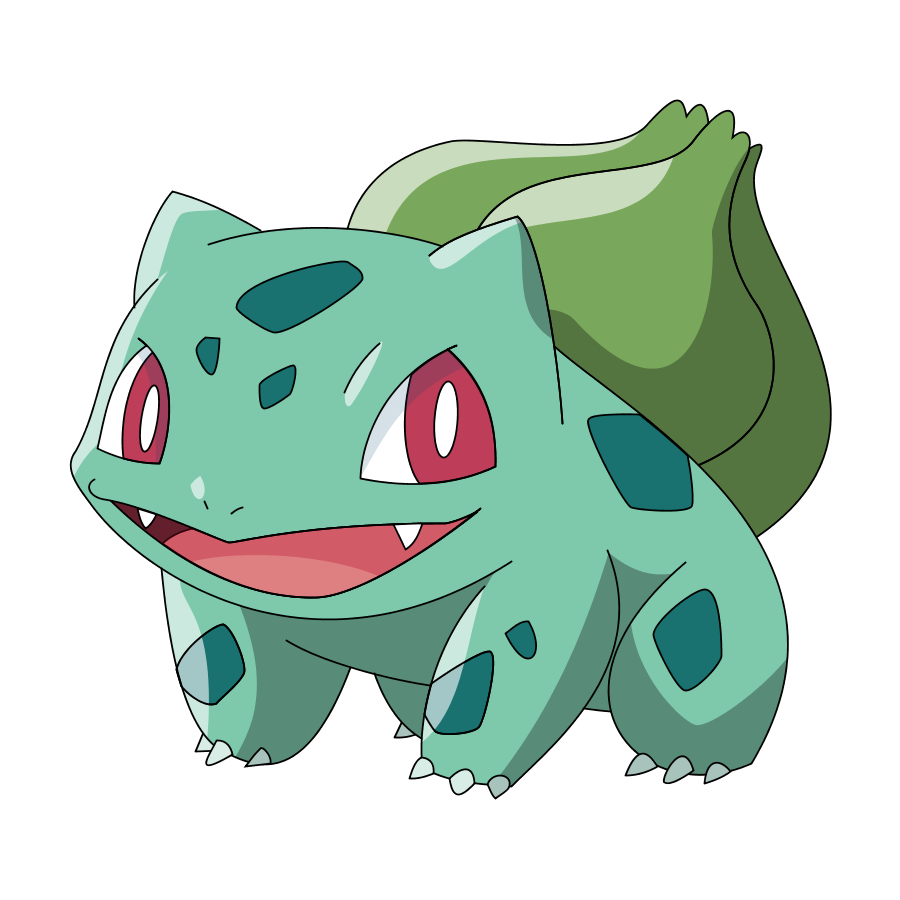

Model predicted: grass
grass: 95.19%	water: 2.82%	rock: 0.78%	dark: 0.34%	fire: 0.31%	ice: 0.14%	
dragon: 0.12%	normal: 0.12%	poison: 0.08%	psychic: 0.04%	fighting: 0.02%	bug: 0.01%	
electric: 0.01%	fairy: 0.01%	ground: 0.00%	ghost: 0.00%	steel: 0.00%	flying: 0.00%	


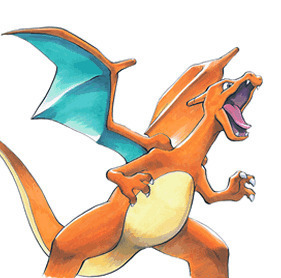

Model predicted: fire
fire: 79.90%	normal: 14.73%	ground: 1.88%	dragon: 1.45%	rock: 0.77%	grass: 0.54%	
bug: 0.30%	water: 0.20%	dark: 0.08%	fighting: 0.06%	psychic: 0.03%	fairy: 0.02%	
electric: 0.02%	steel: 0.00%	poison: 0.00%	ice: 0.00%	ghost: 0.00%	flying: 0.00%	


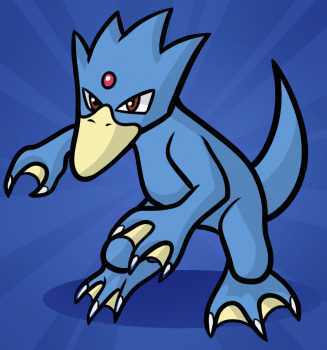

Model predicted: poison
poison: 41.46%	water: 40.88%	rock: 9.42%	psychic: 3.47%	grass: 2.21%	dragon: 1.29%	
bug: 0.60%	normal: 0.37%	fighting: 0.08%	dark: 0.07%	ice: 0.07%	steel: 0.03%	
ground: 0.03%	ghost: 0.01%	electric: 0.00%	flying: 0.00%	fire: 0.00%	fairy: 0.00%	


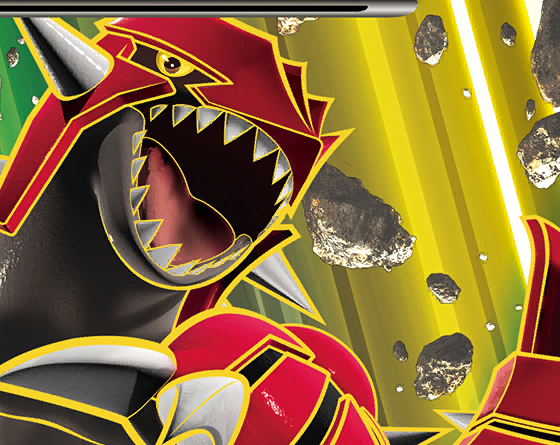

Model predicted: dragon
dragon: 15.39%	bug: 14.18%	water: 12.68%	fire: 8.52%	normal: 7.37%	fairy: 7.36%	
psychic: 7.06%	ground: 6.65%	electric: 6.60%	dark: 3.91%	fighting: 2.42%	steel: 2.24%	
rock: 1.71%	poison: 1.51%	ice: 1.09%	grass: 0.70%	flying: 0.40%	ghost: 0.21%	


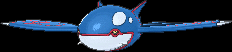

Model predicted: water
water: 46.68%	steel: 21.94%	dragon: 10.49%	dark: 9.29%	bug: 5.28%	rock: 3.76%	
poison: 0.71%	normal: 0.60%	electric: 0.57%	grass: 0.31%	ice: 0.18%	ground: 0.10%	
psychic: 0.03%	fighting: 0.03%	fire: 0.02%	fairy: 0.01%	ghost: 0.00%	flying: 0.00%	


In [27]:
test_pokemon_list = ["Bulbasaur", "Charizard", "Golduck", "Groudon", "Kyogre"]
for pokemon in test_pokemon_list:
    make_prediction(pokemon)